# Importing necessary modules

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

# Importing the car_dataset

In [5]:
df=pd.read_csv("car data (1).csv")

In [6]:
df.shape

(301, 9)

In [7]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Data Exploration

In [11]:
cate=list(set(df["Owner"]))

In [12]:
cate

[0, 1, 3]

In [13]:
df.shape

(301, 9)

In [14]:
new_df=df[df["Owner"].isin(cate)]

In [15]:
new_df.shape

(301, 9)

In [16]:
o1=new_df[new_df["Owner"]==0]

In [17]:
o1.shape

(290, 9)

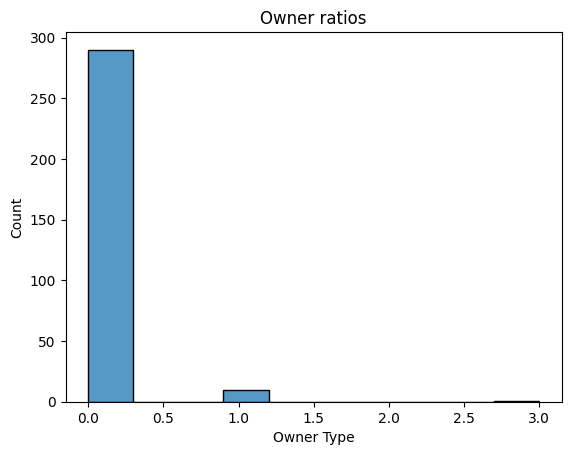

In [18]:
sns.histplot(data=new_df,x="Owner",bins=10,kde=0)
plt.xlabel("Owner Type")
plt.ylabel("Count")
plt.title("Owner ratios")
plt.show()

In [19]:
fuel_cate=list(set(new_df["Fuel_Type"]))

In [20]:
pet=new_df[new_df["Fuel_Type"].isin(fuel_cate)].Fuel_Type

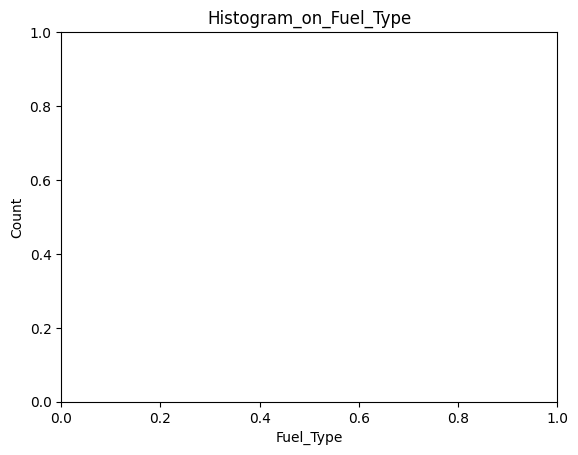

In [21]:
plt.xlabel("Fuel_Type")
plt.ylabel("Count")
plt.title("Histogram_on_Fuel_Type")
plt.show()

# Feature Engineering

In [22]:
df["No_of_year"]=2023-df["Year"]

In [23]:
df.drop(columns=["Car_Name"],inplace=True)

In [24]:
df.drop(columns=["Year"],inplace=True)

# Getting the Datas ready for model Training

In [25]:
final_Dataset=pd.get_dummies(df,drop_first=1)

In [26]:
final_Dataset

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,7,1,0,0,1
297,4.00,5.90,60000,0,8,0,1,0,1
298,3.35,11.00,87934,0,14,0,1,0,1
299,11.50,12.50,9000,0,6,1,0,0,1


In [27]:
corr=final_Dataset.corr()

In [28]:
top_corr=corr.index

In [29]:
top_corr

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'No_of_year',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [30]:
final_Dataset[top_corr]

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,7,1,0,0,1
297,4.00,5.90,60000,0,8,0,1,0,1
298,3.35,11.00,87934,0,14,0,1,0,1
299,11.50,12.50,9000,0,6,1,0,0,1


In [31]:
x=final_Dataset.iloc[:,1:]

In [32]:
x.shape

(301, 8)

In [33]:
y=final_Dataset["Selling_Price"]

In [34]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [35]:
x

,Present_Price,Kms_Driven,Owner,No_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,7,1,0,0,1
297,5.90,60000,0,8,0,1,0,1
298,11.00,87934,0,14,0,1,0,1
299,12.50,9000,0,6,1,0,0,1


In [36]:
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [37]:
imp=model.feature_importances_

In [38]:
imp

array([4.24702906e-01, 4.20404440e-02, 4.01935153e-04, 8.05712267e-02,
       1.83958463e-01, 2.12244419e-02, 1.27506608e-01, 1.19593976e-01])

In [39]:
series=pd.Series(model.feature_importances_,index=x.columns)

In [40]:
series

Present_Price             0.424703
Kms_Driven                0.042040
Owner                     0.000402
No_of_year                0.080571
Fuel_Type_Diesel          0.183958
Fuel_Type_Petrol          0.021224
Seller_Type_Individual    0.127507
Transmission_Manual       0.119594
dtype: float64

# Top 5 features with most impact

<Axes: >

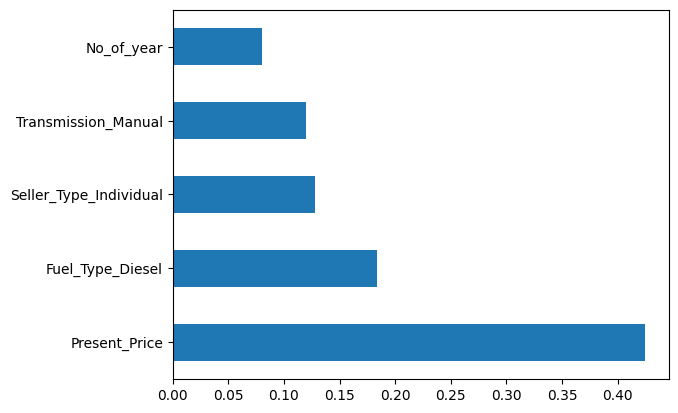

In [41]:
series.nlargest(5).plot(kind="barh")

# Test and Train Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rf_random=RandomForestRegressor()

In [46]:
import numpy as np
n_estimators=[int(x) for x in np.linspace(100,1200,12)]

In [47]:
max_features=["auto","sqrt"]
min_samples_split=[2,5,10,15,100]

In [48]:
min_samples_leaf=[1,2,5,10]

In [49]:
max_depth=list(int(x) for x in  np.linspace(5,30,6))

In [50]:
random_grid={
    "n_estimators":n_estimators,
    "max_depth":max_depth,
    "max_features":max_features,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf
}

In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
rf=RandomForestRegressor()

In [53]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring="neg_mean_squared_error",n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [54]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [55]:
predictions=rf_random.predict(X_test)

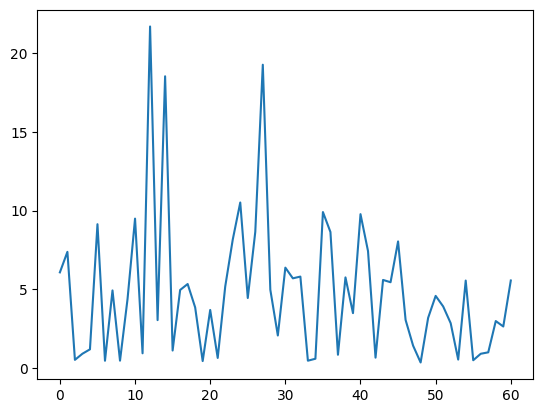

In [56]:
plt.plot(predictions)

# below plot shows the difference between the actual value and predicted value

C:\Users\USER\AppData\Local\Temp\ipykernel_1820\2934983542.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions,kde=1)


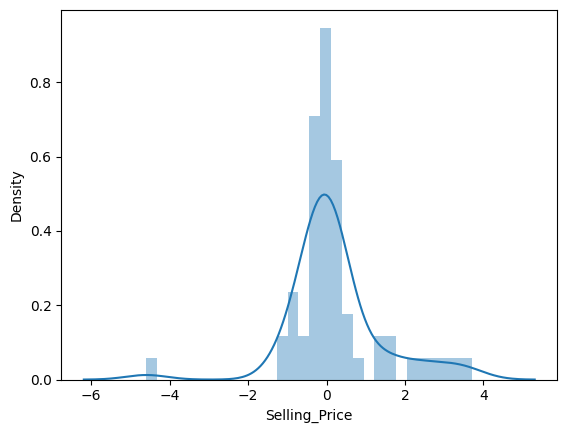

In [57]:
sns.distplot(y_test-predictions,kde=1)
plt.show()

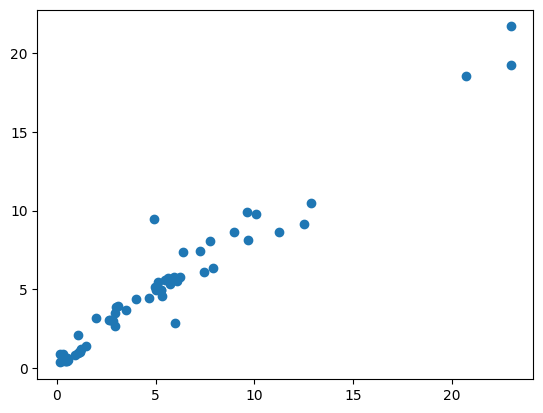

In [58]:
plt.scatter(y_test,predictions)

In [59]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test,predictions)

In [60]:
mae

0.7085359016393495

# Accuracy:77.04570491803261